In [57]:
%matplotlib inline

In [58]:
#Importing dataset
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings(action='ignore')

In [59]:
# Read CSV
df = pd.read_csv("Diabetes_Prediction_Clean.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
60175,Female,26.0,0,0,never,34.34,6.5,160,0
60176,Female,40.0,0,0,never,40.69,3.5,155,0
60177,Male,66.0,0,0,former,27.83,5.7,155,0
60178,Female,24.0,0,0,never,35.42,4.0,100,0


In [60]:
# The size of the data set was examined.
df.shape

(60180, 9)

In [61]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60180 entries, 0 to 60179
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               60180 non-null  object 
 1   age                  60180 non-null  float64
 2   hypertension         60180 non-null  int64  
 3   heart_disease        60180 non-null  int64  
 4   smoking_history      60180 non-null  object 
 5   bmi                  60180 non-null  float64
 6   HbA1c_level          60180 non-null  float64
 7   blood_glucose_level  60180 non-null  int64  
 8   diabetes             60180 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.1+ MB


In [62]:
# The classes of the outcome variable were examined.
df.diabetes.value_counts()

0    53606
1     6574
Name: diabetes, dtype: int64

In [63]:
# The distribution of the Outcome variable was examined.
df["diabetes"].value_counts()*100/len(df)

0    89.076105
1    10.923895
Name: diabetes, dtype: float64

# Piechart and countplot to show percentage of Diabetic and Non Diabetic

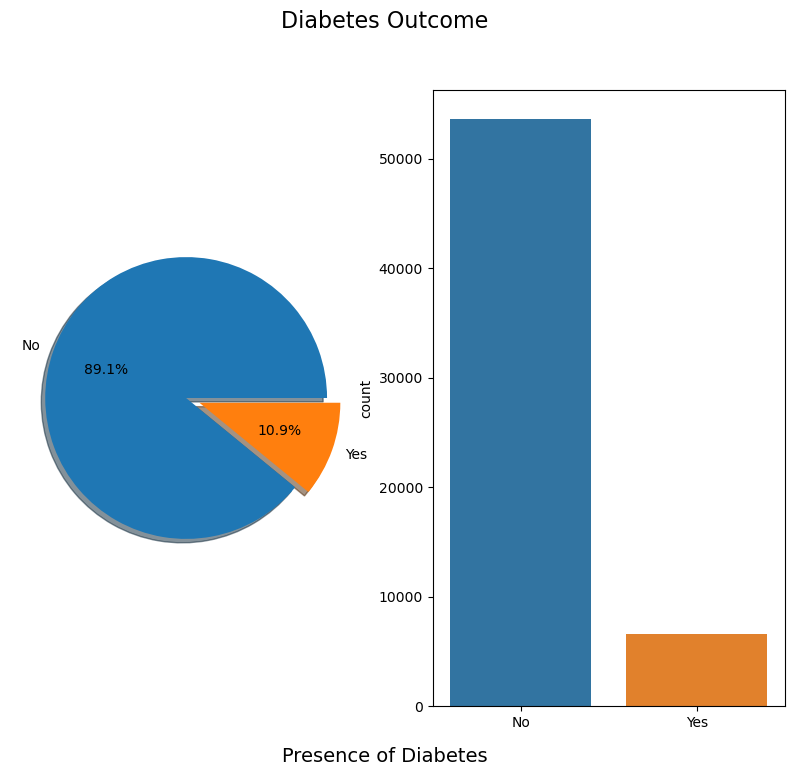

In [64]:
# The distribution of the outcome variable in the data was examined and visualized.
xtick_labels = ['No', 'Yes']  

# Creating subplots
f, ax = plt.subplots(1,2,figsize=(10,8))

# Pie Chart
diabetes_counts = df['diabetes'].value_counts()
ax[0].pie(diabetes_counts, labels= xtick_labels, explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Bar graph
sns.countplot(x = 'diabetes', data = df, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_xticklabels(xtick_labels)

# Set a single title and xlabel for both graphs
f.suptitle('Diabetes Outcome', fontsize=16)
f.text(0.5, 0.04, 'Presence of Diabetes', ha='center', fontsize=14)

# Show the plot
plt.show()

In [65]:
df[['gender','diabetes']]

,gender,diabetes
0,Female,0
1,Male,0
2,Female,0
3,Male,0
4,Female,0
...,...,...
60175,Female,0
60176,Female,0
60177,Male,0
60178,Female,0


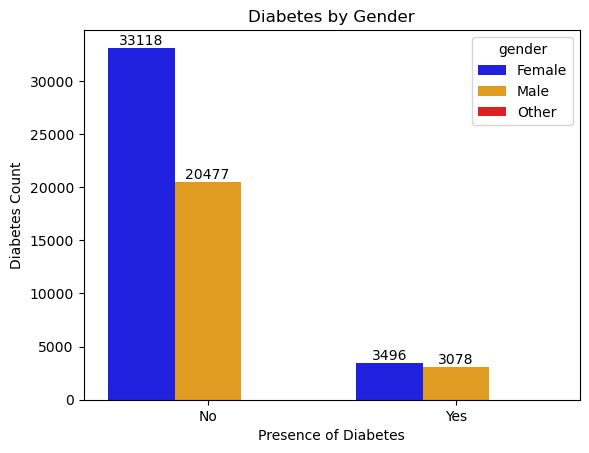

In [66]:
#Plotting a barchart between gender and diabetes
ax=sns.countplot(df,x='diabetes',hue='gender',palette=['Blue','Orange','red'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
xtick_labels = ['No', 'Yes']  
ax.set_xticklabels(xtick_labels)

plt.xlabel('Presence of Diabetes')
plt.ylabel('Diabetes Count')
plt.title('Diabetes by Gender')
plt.show()

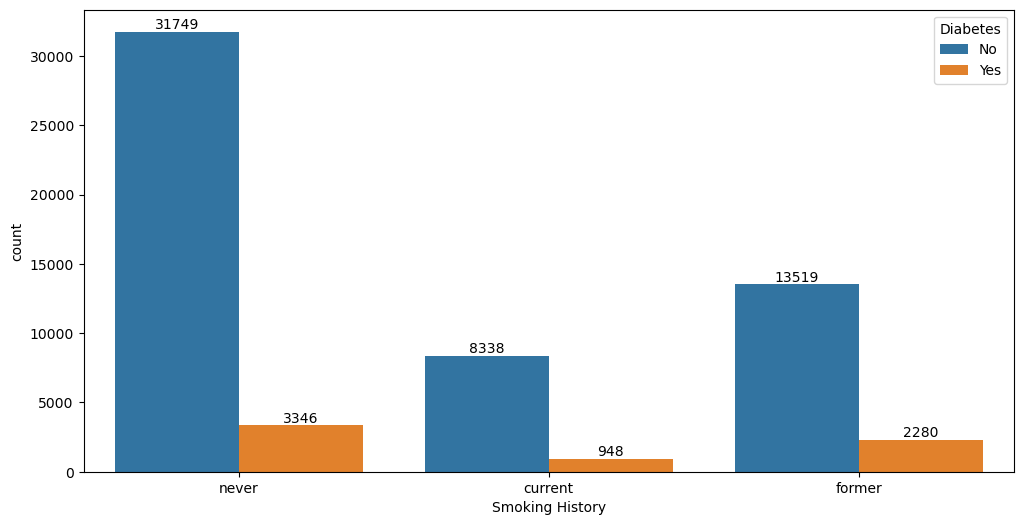

In [67]:
#plotting a graph to display the probability of diabetes occurence with smoking history
plt.figure(figsize=(12,6))
ax=sns.countplot(df,x='smoking_history',hue='diabetes')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Set x-label
ax.set_xlabel('Smoking History')

# Adding legend details
ax.legend(title='Diabetes', labels=['No', 'Yes'])

# Show graph
plt.show()

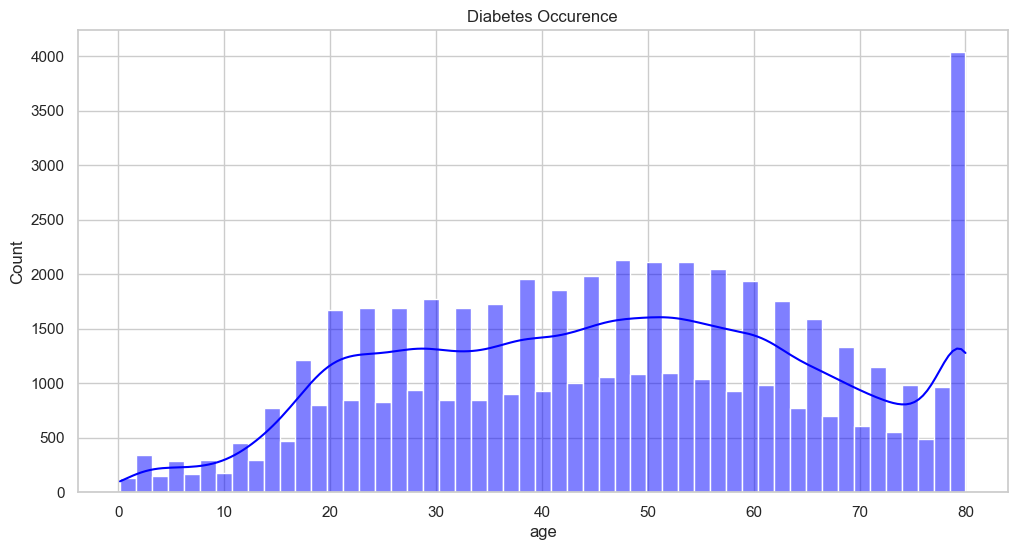

In [68]:
#plotting a histogram to display the probability of diabetes occurence with age
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.histplot(df,x='age', color = 'Blue',kde = True,)
plt.title('Diabetes Occurence')
plt.show()

<Axes: xlabel='HbA1c_level'>

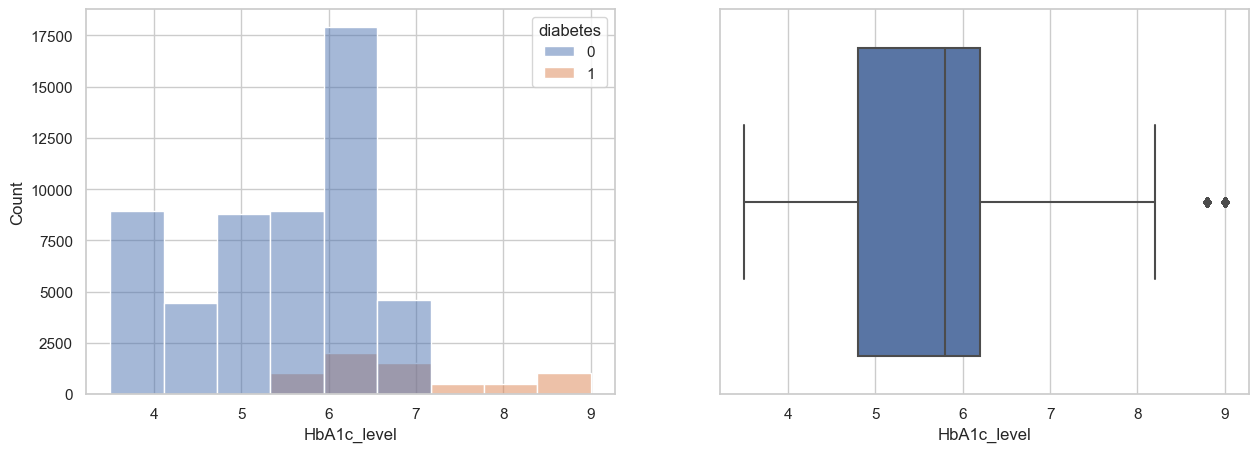

In [69]:
#plotting a histogram and a box graph
fig, axes = plt.subplots(1,2, figsize=(15,5),squeeze=False)

sns.histplot(df,x='HbA1c_level',hue='diabetes',bins= 9,ax=axes[0,0])
sns.boxplot(df,x='HbA1c_level',ax=axes[0,1])

<Axes: xlabel='blood_glucose_level'>

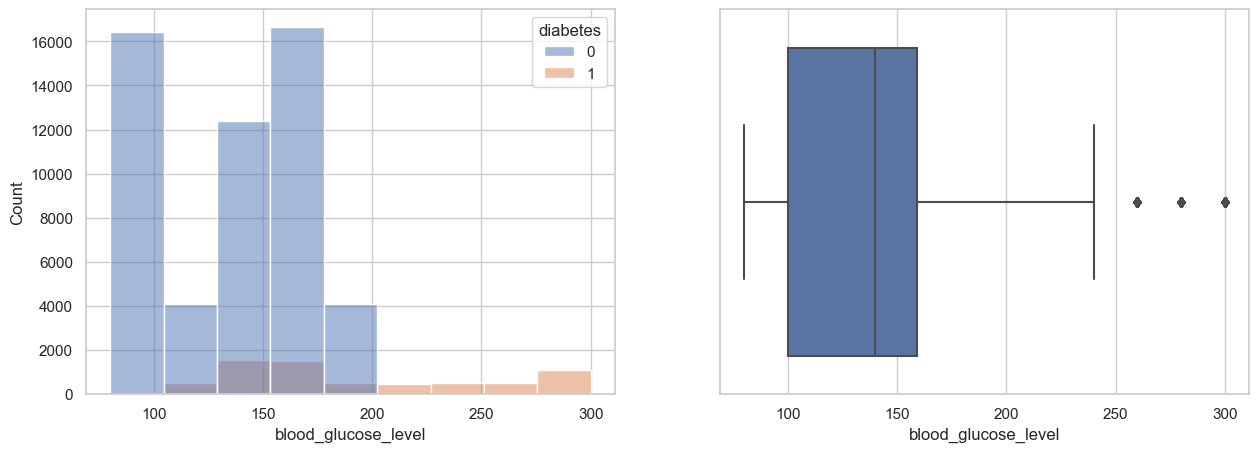

In [70]:
#plotting a histogram and a box graph
fig, axes = plt.subplots(1,2, figsize=(15,5),squeeze=False)

sns.histplot(df,x='blood_glucose_level',hue='diabetes',bins= 9,ax=axes[0,0])
sns.boxplot(df,x='blood_glucose_level',ax=axes[0,1])

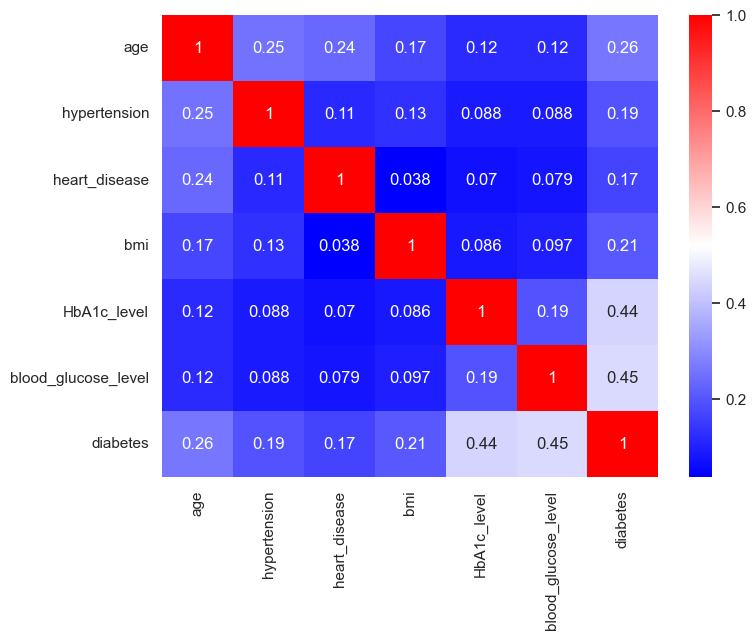

In [71]:
#Correlation analysis using Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='bwr',annot = True)
plt.show()

Analysis : We can see strong relationship between age , HBA1c , blood_glocuse_level factors and diabeties.

# Feature Selection

In [72]:
df = pd.get_dummies(df)

In [73]:
#lets extract features and targets
X = df.drop(columns=['diabetes'])
Y = df['diabetes']
print("Features Extraction Sucessfull")

Features Extraction Sucessfull


# Feature Importance

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[1.23697714e-01 2.47101599e-02 1.48329110e-02 1.42766443e-01
 3.60531906e-01 3.23444613e-01 1.95425899e-03 1.87782537e-03
 4.35183382e-06 1.52752636e-03 2.59839356e-03 2.05389749e-03]


# Splitting Dataset

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Using Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
logistic_accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy Score:", logistic_accuracy)

Accuracy Score: 0.944832170156198


In [94]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[10507   151]
 [  513   865]]


# Using KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy Score:", knn_accuracy)

Accuracy Score: 0.9359421734795613


# Using SVC

In [96]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
svc_accuracy = accuracy_score(Y_test,pred_y)
print("Accuracy Score:", svc_accuracy)

Accuracy Score: 0.9291292788301762


# Using Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=1)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
tree_accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy Score:", tree_accuracy)

Accuracy Score: 0.9396809571286141


# Using GaussianNB

In [98]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
gaussian_accuracy = accuracy_score(Y_test,y_pred3)
print("Accuracy Score:", gaussian_accuracy)

Accuracy Score: 0.8681455633100698


# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
forest_accuracy = accuracy_score(Y_test,y_pred2)
print("Accuracy Score:", forest_accuracy)

Accuracy Score: 0.959205716184779


# Results

In [100]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [logistic_accuracy, knn_accuracy, svc_accuracy, tree_accuracy, gaussian_accuracy, forest_accuracy]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                        Model
Score                        
0.959206        Random Forest
0.944832  Logistic Regression
0.939681        Decision Tree
0.935942                  KNN
0.929129                  SVC
0.868146           GaussianNB


In [101]:
# Hence I will use Random Forecast algorithm for training my model.